### Let's import the necessary modules for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
%matplotlib inline

- Reading in the dataset

In [3]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Assigning column names to the dataset

In [5]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restcg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [12]:
df.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We can see that column 'thal' and 'ca' are objects(strings), let's have a deeper look into
the structure of these columns

In [26]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Both 'ca' and 'thal' have missing values , let's remove those strings with '?' string

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

#### Located and drop rows with missing data

In [14]:
df.shape

(303, 14)

In [15]:
# We can see that these are four rows , not a big deal for a dataset with 303 rows 
df.loc[ (df['ca']=='?') | (df['thal']=='?')].index

Int64Index([87, 166, 192, 266, 287, 302], dtype='int64')

Dropping rows inplace 

In [16]:
df.drop(df.loc[ (df['ca']=='?') | (df['thal']=='?')].index,inplace=True)

In [18]:
df.shape

(297, 14)

Let's transform the column 'ca' into a numeric datatype instead of object, since this is the information given by the dataset at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [27]:
df['ca'] = pd.to_numeric(df['ca'])

In [28]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restcg     float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal        object
hd           int64
dtype: object

# Data preparation

In [30]:
X = df.drop(columns='hd')
X.head()

,age,sex,cp,restbp,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [31]:
y = df['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### Encoding categorical features into numeric

A brief look into the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease) attribute information allows us to check which features are categorical and which are numeric, so we can encode as categorical variables the right features.

In [53]:
X_encod = pd.get_dummies(X,columns=['cp','restcg','slope','thal'])
X_encod.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restcg_0.0,restcg_1.0,restcg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


We can note that the target variable ranges from 0 to 4. Since experiments with this data have been performed on simpy presence/absence values we will transform all non zero value into ones to define the presence of heart disease and leave 0 as absence of heart disease

In [54]:
y.unique()

array([0, 1], dtype=int64)

In [55]:
pd.options.mode.chained_assignment = None 
y.loc[y>0] = 1
y.unique()

array([0, 1], dtype=int64)

# Building the model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_encod, y,random_state=42)

clf_dt = DecisionTreeClassifier()

Fitting the model to the training set

In [57]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

We can use the function *export_graphviz* to export a graph into DOT format. DOT is a graph description languague that renders graphs (directed/undirected). We can first produce a dot file and save under the name 'tree.dot' and after we convert this dot file to .png format so we can visualize on jupyter notebook

In [58]:
export_graphviz(clf_dt,out_file='tree.dot',feature_names=X_encod.columns,
                class_names=['NO HD', 'YES HD'],filled=True)

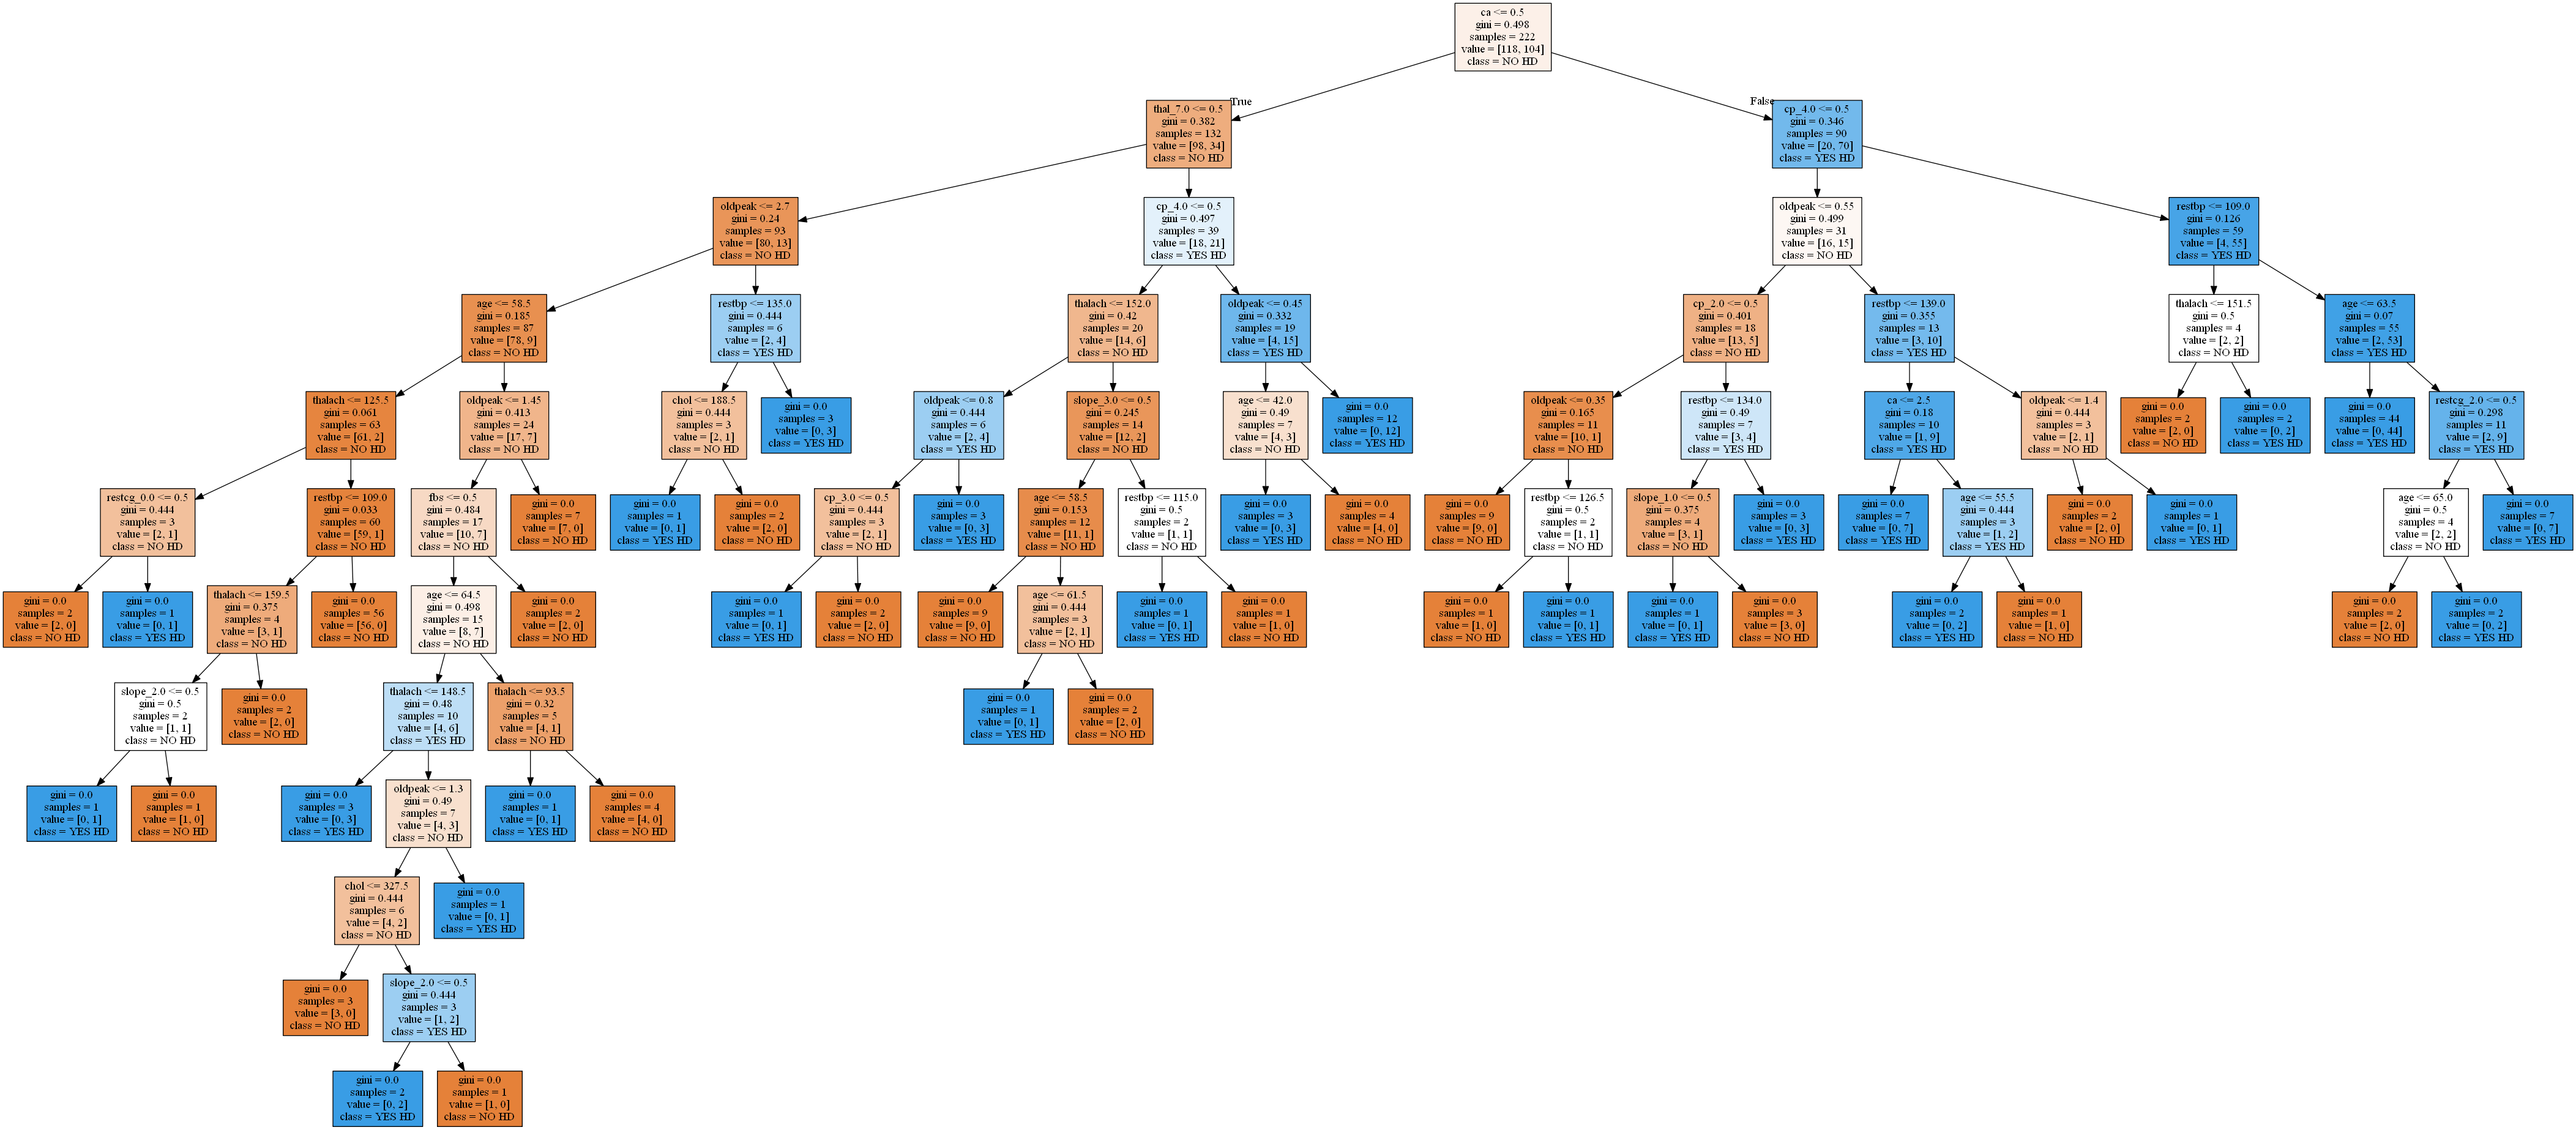

In [59]:
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename='tree.png')

Another way to render graphs is to use the function plot_tree , although the first method produces better looking graphs.

We can notice that this graph is huge and hardly impossible to interpret. Since decision trees have interpretability as one of its main advantages over other algorithms like random forest and bagging, it would be great if we could prune this tree so as to few branches that can provide better interpretability without losing information. In other words we want to reduce the variance at the cost of little bias by pruning the tree.

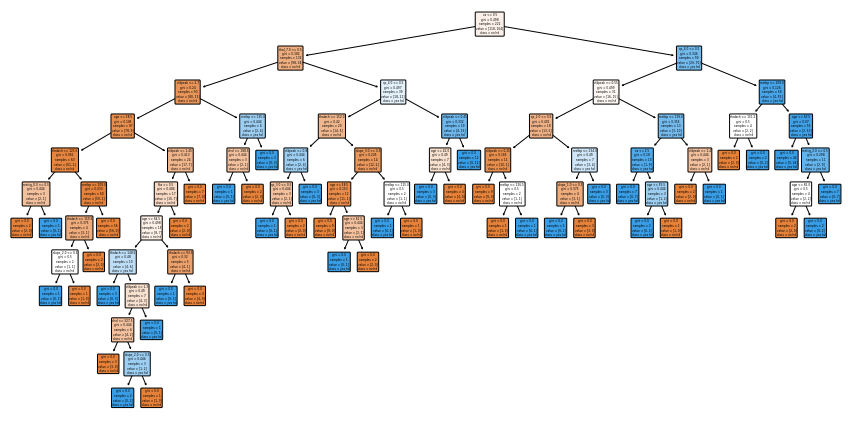

In [60]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['no hd','yes hd'],
         feature_names=X_encod.columns);

Let's plot a confusion matrix to see how accurate this decision tree model is predicting new labels.

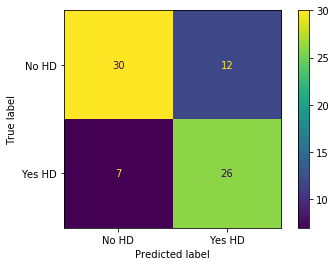

In [61]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=['No HD','Yes HD']);

We can note from the plot above that the prediction accuracy for absence HD is approx 71% while for presence is  approx 78%.

## An overview about cost complexity pruning and the tuning parameter $\alpha$

The strategy to prune a tree is to grow a very large tree first in order to obtain a subtree. Our goal is to obtain a subtree that leads to the lowest test error rate. Given a subtree , we can estimate its test error rate using cross-validation however this would be too computationally costly since there is an extremely large number of possible subtrees.

A solution for that lies on *cost complexity pruning*. Rather than considering every possible subtree , we only consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$ (alpha). The tuning parameter $\alpha$ controls a trade-off between the subtree's complexity and its fit to the training data. When $\alpha=0$ the subtree will simply equal to the original tree, however when $\alpha$ increases we will add complexity to the model. The selected value for $\alpha$ is determined via cross validation, which will then return to the full data set using $\alpha$ to obtain the subtree.

In [62]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas,impurities = path.ccp_alphas,path.impurities

This graph shows that when $\alpha$ increases more of the tree is pruned, thus increasing the impurity of its leaves (nodes). I'm leaving out the last value of alpha since this is the trivial tree with only one node (the most impure one).

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

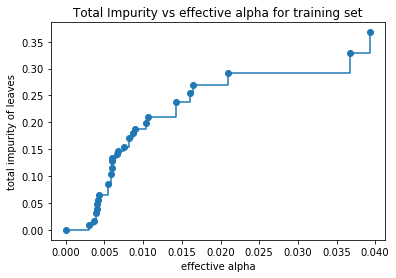

In [47]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# The naive approach of choosing $\alpha$

Now let's store all the different DecisionTreeClassifier models with different values of alpha into a list

In [64]:
clf_dts = []

for i in ccp_alphas[:-1]:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

And extract the accuracy scores for all these models that have different $\alpha$ values and store it in a list. Let's extract accuracy scores for both the trainig set and the test set

In [70]:
train_scores = [n.score(X_train,y_train) for n in clf_dts]
test_scores =  [n.score(X_test,y_test) for n in clf_dts]

Now lets just plot the train and test sets of accuracy scores against the all the extracted $\alpha$ values derived from *cost complexity pruning* and have a good visualization of the best spot where train and test set have the highest accuracy. It looks like around 0.015 and 0.017 value from the graph or where the lines are joining. 

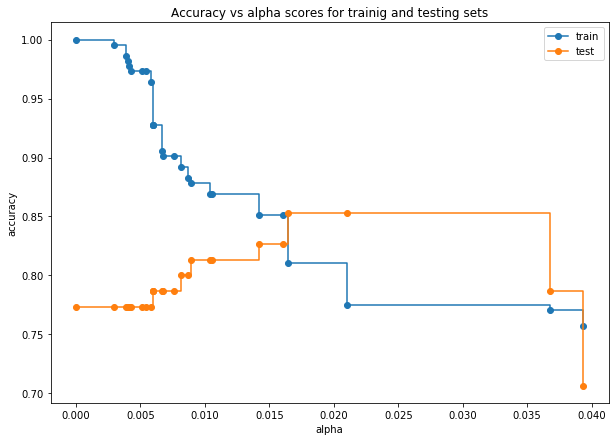

In [72]:
fig,ax = plt.subplots(figsize=(10,7))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha scores for trainig and testing sets')
ax.plot(ccp_alphas[:-1],train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas[:-1],test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend();

There are many ways we could have divided the original datset into X_train and y_train, we just picked one way in infer the $\alpha$ value in this naive approach. In order to obtain a fair estimate of $\alpha$ the best way to approach this problem is by runnnig Cross Validation and 

## Showing why Cross Validation is the right way to pick $\alpha$

Let's build a Decision Tree model now using the $\alpha$ determined by the naive approach.

We will use 5 fold cross validation to create 5 different training and testing datasets that
are then

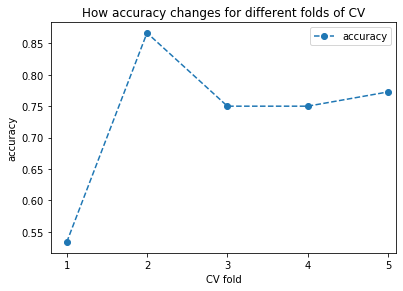

In [103]:
clf_dt= DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
#  alpha 0.016 comes from the graph above by naively eyeballing the best alpha. 

scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
# create 5 different accuracy scores CV fold and store in an array called scores

df = pd.DataFrame(data={'CV fold':range(1,6),'accuracy':scores})
# create dataframe

# note that we end up with different accuracy scores for each run of cv,
# this proves that the naive approach is not good on assigning alpha.

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot('CV fold','accuracy',data=df,marker='o',linestyle='--',label='accuracy')
axes.set_xticks([0,1,2,3,4,5])
axes.set_xlabel('CV fold')
axes.set_ylabel('accuracy')
axes.set_title('How accuracy changes for different folds of CV')
axes.set_xlim([0.8,5.1])
axes.legend();

Note in the code below that 5 cv provides 5 different accuracy scores, what if we take the mean of these accuracy scores as good representations for the real accuracy of our model. That's a great ideas ! Let's do this for every $\alpha$ value provided by the *cost complexity pruning* function so we spot on the best $\alpha$ value to use.

In [76]:
clf_dt
scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
scores

array([0.53333333, 0.86666667, 0.75      , 0.75      , 0.77272727])

Getting mean and standard deviation scores of all DecisionTreeClassifier models with different $\alpha$ values. 

In [105]:
alpha_loop_values = []

for i in ccp_alphas[:-1]:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])

Representing these values in pandas dataframe.

In [106]:
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.head()

,alpha,mean_accuracy,std
0,0.000000,0.675556,0.099330
1,0.002953,0.675556,0.099330
2,0.003861,0.680000,0.093173
3,0.004054,0.680000,0.093173
4,0.004095,0.680000,0.093173


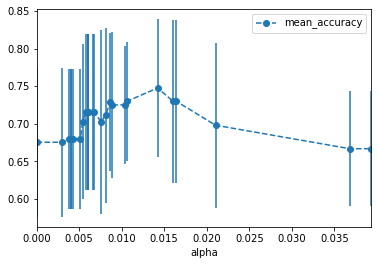

In [107]:
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--');

Using cross validation we can see that instead of setting ccp_alpha=0.016 or something around 0.015 and 0.017 like previously spotted using the naive method, we need to set it to something closer to 0.014 as the plot above suggests. We can find the exact value with:

In [108]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [109]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

We have a pandas series object, let's transform into a float

In [111]:
ideal_ccp_alpha = float(ideal_ccp_alpha)

Now let's run the model with the IDEAL alpha value.

In [112]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

For the absence of Heart Disease we now have prediction accuracy of 81% and for presence 85%, significant improvement over the non pruned tree which overfitted our model.

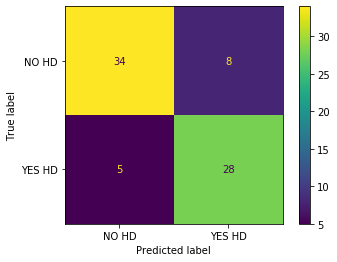

In [114]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=['NO HD','YES HD']);

## The pruned tree is better than the full size tree

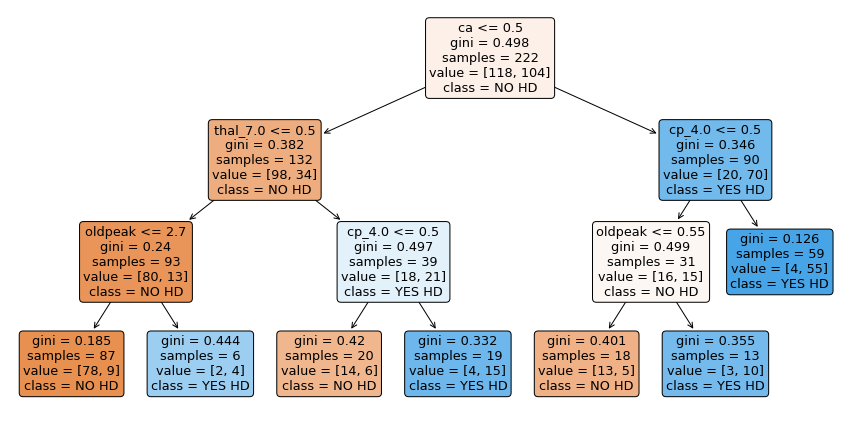

In [115]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['NO HD','YES HD'],
          feature_names=X_encod.columns);

In [116]:
export_graphviz(clf_dt_pruned,out_file='pruned_tree.dot',feature_names=X_encod.columns,
                class_names=['NO HD', 'YES HD'],filled=True)

In [117]:
!dot -Tpng pruned_tree.dot -o pruned_tree.png

### Finally let's interpret the decision tree:

Each node uses a column of the dataset to split the tree, the first node known as the root node splits for ca$\leq$0.5, when ca$\leq$0.5 is True we follow the steps down the left node which is thal_7.0$\leq$0.5.

The gini index is a measure of node purity, the lower the more pure a node or leaf is.

The leafs don't have color names because they'are no longer splitting the data.

We also have the total number of samples and values for the classification criteria. The class in each box(node) tells you the majority, so the first values are 118 people that do not have heart disease and 104 people do have heart disease. 

The colors are also corresponding to the majority, the majority of NO HD is orange and the majority of YES HD is blue.

The darker the color the lower the gene impurity and better the split. Dark orange nodes have greater purity than light orange nodes, the same applies to blue.

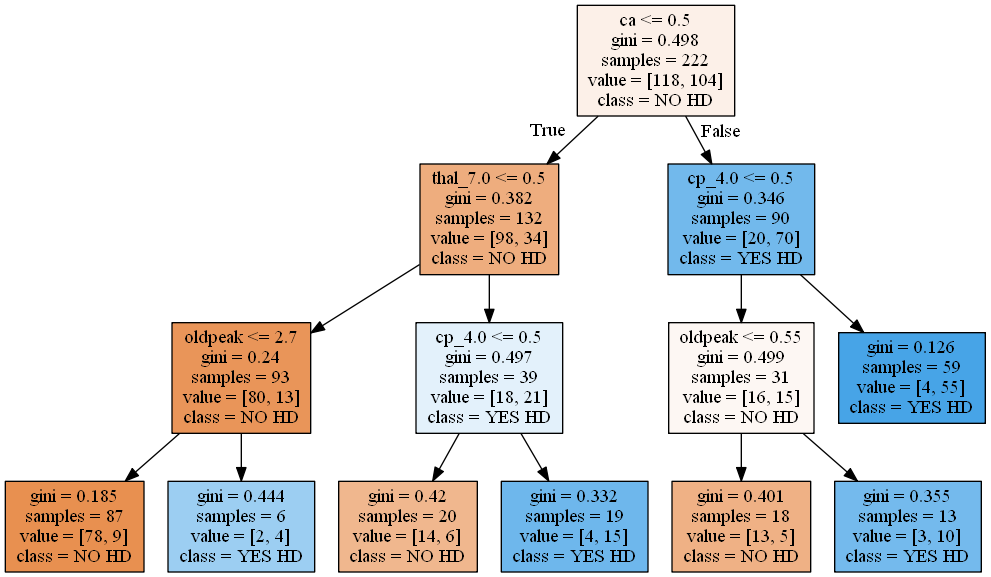

In [118]:
from IPython.display import Image
Image(filename='pruned_tree.png')